## THE BEHAVIOR OF THE FEAR NETWORK COULD BE AFFECTED BY THE INTENSITY OF THE STIMULUS AND THE INTEGRITY OF THE NETWORK

In [1]:
from netpyne import specs, sim

Create type A, B and C neurons and interneurons with proportion (80:20) between neurons and interneurons and each neuron type with proportion (50:30:20) only to print the spikes and raster

In [2]:
tstop = 1000.0

arq = './KimEtAl2013/LAcells_template.hoc'
arq2 = './KimEtAl2013/interneuron_template.hoc'

# Network parameters
netParams = specs.NetParams() # object of class NetParams to store the network parameters
## Population parameter
n_neurons = 20 #total number of neurons
netParams.popParams['A_pop'] = {'cellType': 'A', 'numCells': int((n_neurons*0.8)*0.5), 'cellModel': 'HH'}
netParams.popParams['B_pop'] = {'cellType': 'B', 'numCells': int((n_neurons*0.8)*0.3), 'cellModel': 'HH'}
netParams.popParams['C_pop'] = {'cellType': 'C', 'numCells': int((n_neurons*0.8)*0.2), 'cellModel': 'HH'}
netParams.popParams['IN_pop'] = {'cellType': 'Interneuron', 'numCells': int(n_neurons*0.2), 'cellModel': 'HH'}


Import amygdala cells A, B, C and interneurons of the model of Kim at al. (2013) and their synaptic mechanisms

In [3]:
### Import A
netParams.importCellParams(label='A_rule', conds={'cellType': 'A', 'cellModel': 'HH'}, 
                           fileName=arq, cellName='Cell_A', importSynMechs=True)
### Import B
netParams.importCellParams(label='B_rule', conds={'cellType': 'B', 'cellModel': 'HH'}, 
                           fileName=arq, cellName='Cell_B', importSynMechs=True)
## Import C
netParams.importCellParams(label='C_rule', conds={'cellType': 'C', 'cellModel': 'HH'}, 
                           fileName=arq, cellName='Cell_C', importSynMechs=True)
## Import interneurons
netParams.importCellParams(label='IN_rule', conds={'cellType': 'Interneuron', 'cellModel': 'HH'}, 
                           fileName=arq2, cellName='InterneuronCell', importSynMechs=True)

{conds: {cellType: 'Interneuron', cellModel: 'HH'}, secs: {soma: {geom: {L: 15.0, nseg: 1, diam: 15.0, Ra: 3375.0, cm: 1.0}, topol: {}, mechs: {kdrinter: {gkdrbar: 0.008}, leakinter: {glbar_inter: 5e-05, el: -70.0}, nainter: {gnabar: 0.035}}, ions: {k: {e: -80.0, i: 54.4, o: 2.5}, na: {e: 45.0, i: 10.0, o: 140.0}}}, dend: {geom: {L: 150.0, nseg: 1, diam: 10.0, Ra: 150.0, cm: 1.0}, topol: {parentSec: 'soma', parentX: 1.0, childX: 0.0}, mechs: {kdrinter: {gkdrbar: 0.003}, leakinter: {glbar_inter: 5e-05, el: -70.0}, nainter: {gnabar: 0.01}}, ions: {ca: {e: 120.0, i: 5e-05, o: 2.0}, k: {e: -80.0, i: 54.4, o: 2.5}, na: {e: 45.0, i: 10.0, o: 140.0}}}}, secLists: {}, globals: {}, _repr_mimebundle_: {}}

In [4]:
## Synaptic mechanism
netParams.synMechParams['AMPA'] = {'mod': 'Exp2Syn', 'tau1': 1.0, 'tau2': 5.0, 'e': 0} # soma NMDA synapse

Define parameters of stimulation
IClamp with a voltage of 0.4 mV, delay of 100 ms and duration of 700 ms

In [5]:
# Stimulation
#netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 20, 'noise': 0.5}
netParams.stimSourceParams['bkg'] = {'type': 'IClamp', 'amp': 0.4, 'delay': 100, 'dur': 700 }
netParams.stimTargetParams['bkg->A'] = {'source': 'bkg', 'conds': {'cellType': 'A'},
                                        'sec': 'soma', 'loc':0.5} #'weight': 0.5,'delay': 5,
#netParams.stimTargetParams['bkg->B'] = {'source': 'bkg', 'conds': {'cellType': 'B'},
 #                                       'sec': 'soma', 'loc': 0.5}
netParams.stimTargetParams['bkg->C'] = {'source': 'bkg', 'conds': {'cellType': 'C'}, 
                                        'sec': 'soma', 'loc':0.5}
netParams.stimTargetParams['bkg->Interneuron'] = {'source': 'bkg', 'conds': {'cellType': 'Interneuron'},
                                                  'sec': 'soma', 'loc'  :0.5}


In [6]:
netParams.connParams['A->B'] = {'preConds': {'cellType': 'A'}, 'postConds': {'cellType': 'B'}, 
                    'probability': 0.5,  # max number of incoming conns to cell	'
                    'weight': 0.02,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': 'soma'
                    }
netParams.connParams['Interneuron->C'] = {'preConds': {'cellType': 'Interneuron'}, 'postConds': {'cellType': 'C'}, 
                    'probability': 0.25,  # max number of incoming conns to cell	'
                    'weight': 0.02,  # synaptic weight
                    'delay': 400, # transmission delay (ms) '
                    'sec': 'soma'
                    }

In [7]:
# Simulation options
simConfig = specs.SimConfig() # object of class SimConfig to store simulation configuration
simConfig.duration = tstop#1*1e3 # Duration of the simulation, in ms
simConfig.dt = 0.025  # Internal integration timestep to use
simConfig.verbose = 0
simConfig.hParams = {'celsius':31}

In [8]:
# Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}
# Dict with traces to record
simConfig.recordStep = 0.01
# Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'model_output'
# Set file output names
simConfig.saveJson = True

Plot the spikes and the raster plot


Creating network of 4 cell populations on 1 hosts...
  Number of cells on node 0: 19 
  Done; cell creation time = 0.04 s.
Making connections...
  Number of connections on node 0: 19 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 19 
  Done; cell stims creation time = 0.00 s.
Recording 4 traces of 1 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 6.11 s; real-time ratio: 0.16.

Gathering data...
  Done; gather time = 0.10 s.

Analyzing...
  Cells: 19
  Connections: 19 (1.00 per cell)
  Spikes: 401 (21.11 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 6.11 s
Saving output as model_output.json  ... 
Finished saving!
  Done; saving time = 1.84 s.
Plotting raster...


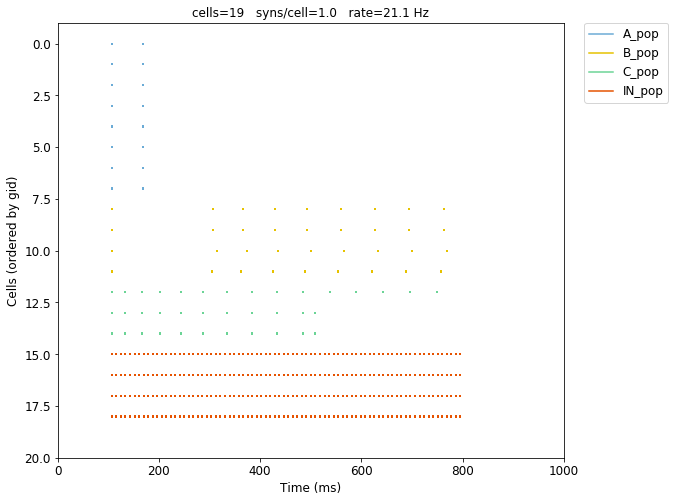

Plotting recorded cell traces ... cell


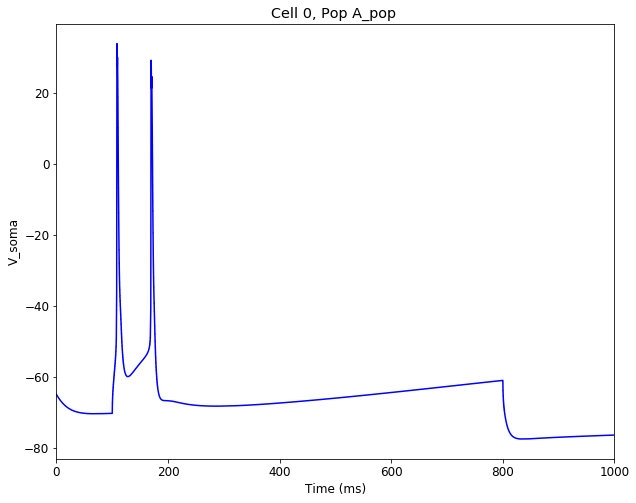

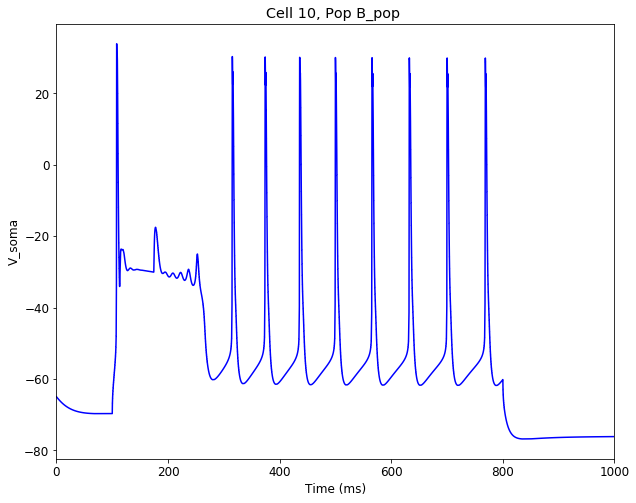

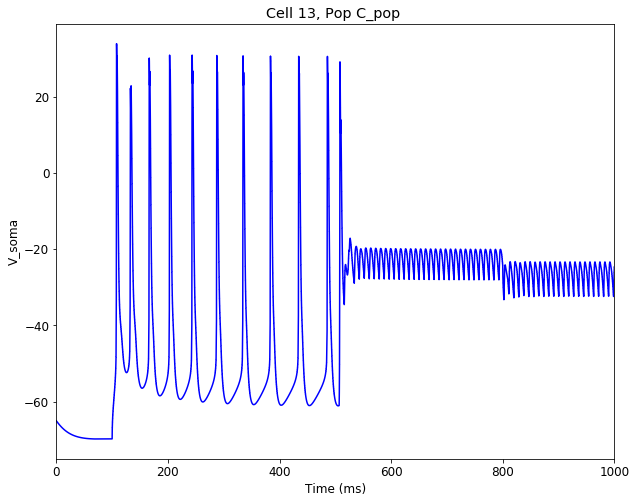

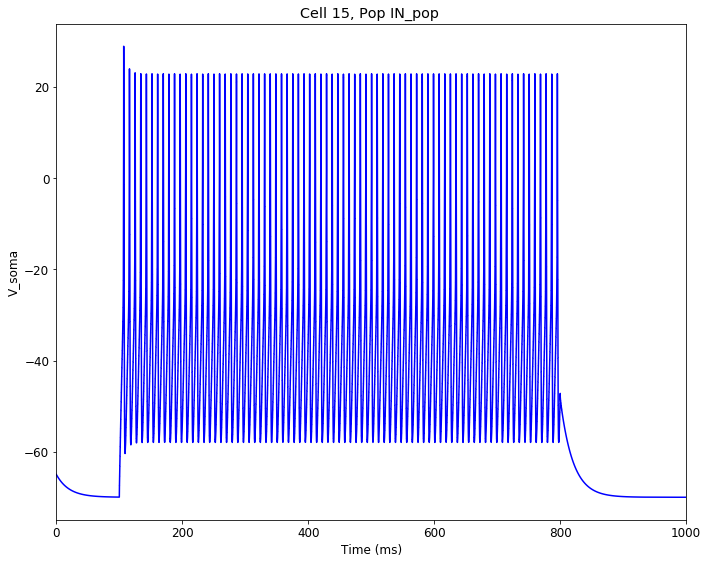

Plotting 2D representation of network cell locations and connections...


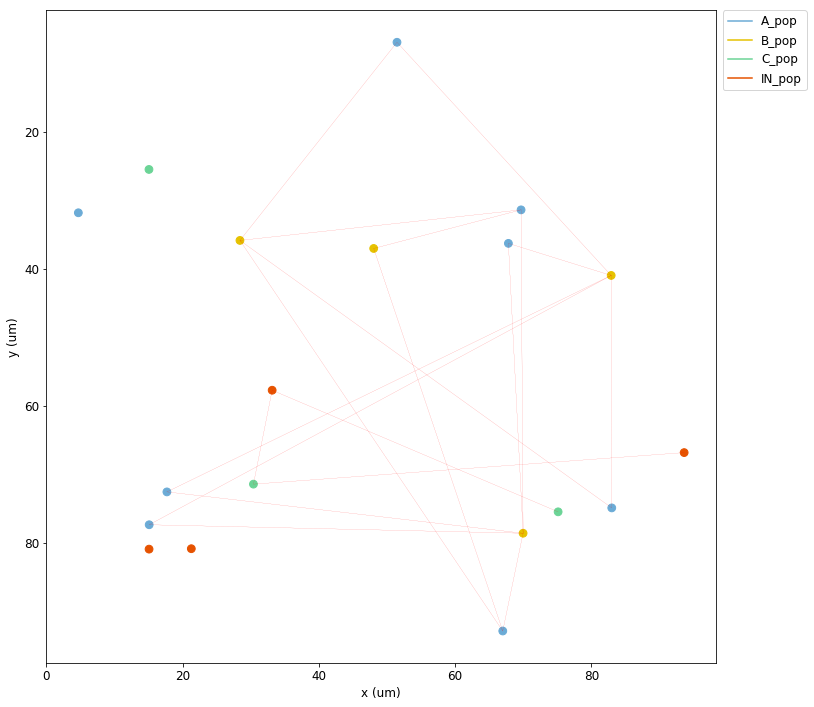

  Done; plotting time = 3.12 s

Total time = 11.23 s


In [9]:
# Save params, network and sim output to pickle file
simConfig.analysis['plotRaster'] = {'orderInverse': True, 'saveFig': 'tut_import_raster.png'}
# Plot a raster
simConfig.analysis['plotTraces'] = {'include': [0,10,13,15]}
simConfig.analysis['plot2Dnet'] = True           # plot 2D visualization of cell positions and connections
# Plot recorded traces for this list of cells
# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)